<a href="https://colab.research.google.com/github/alitourani/deep-learning-from-scratch/blob/main/Codes/ML/Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Flowers Classification**

🎯 **Goal:** We want to classify each of three species of Iris using a simple Machine Learning application. The features useful for the classification process consists of the width and the length of the sepals and petals of the flowers.

🗄️ **Dataset:** Iris Flower ([link](https://archive.ics.uci.edu/ml/datasets/iris) - 150 instances, classified into three classes)


**1. Import Libraries**

In [52]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**2. Import the Dataset**

In [53]:
# Simply, loading the dataset from SKLearn
dataset = datasets.load_iris()

# Summary
print('Dataset loaded!')
print('Features covered by the dataset:', dataset.feature_names)
print('Available categories:', dataset.target_names)

# Let's see the data instances
data = dataset.data
data = pd.DataFrame(data, columns=dataset.feature_names)

# Adding category data (0, 1, or 2) to a new column, named 'class'
data['classNumber'] = dataset.target

print('\nThe Iris Dataset instances:\n', data)

Dataset loaded!
Features covered by the dataset: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Available categories: ['setosa' 'versicolor' 'virginica']

The Iris Dataset instances:
      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  classNumber
0                  5.1               3.5  ...               0.2            0
1                  4.9               3.0  ...               0.2            0
2                  4.7               3.2  ...               0.2            0
3                  4.6               3.1  ...               0.2            0
4                  5.0               3.6  ...               0.2            0
..                 ...               ...  ...               ...          ...
145                6.7               3.0  ...               2.3            2
146                6.3               2.5  ...               1.9            2
147                6.5               3.0  ...               2.0            2
148       

2.1. Check the statistics of the data

In [54]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classNumber
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


2.2. A visualization of data

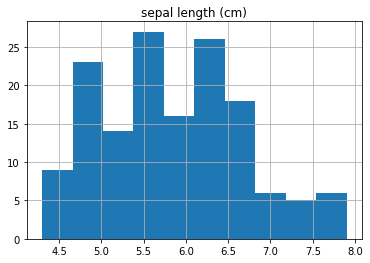

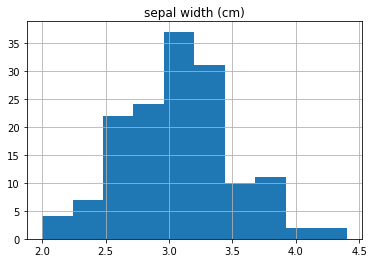

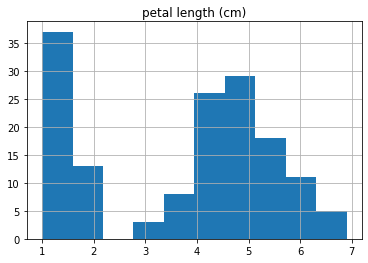

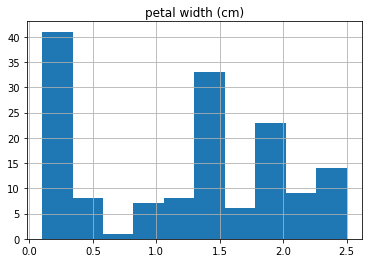

In [55]:
for feature in dataset.feature_names:
  plt.figure()
  plt.title(feature, loc='center', pad=5)
  data[feature].hist()

**3. Working with Data**

3.1. Splitting training set and test set

In [62]:
# Projection of the DataFrame
features = data.values[:, 0:4] # Petal width, petal length, etc.
classes = data.values[:, 4] # classNumber column

# Split parameters
testSize = 0.3 # 30% of data is reserved for test

# Splitting data
features_train, features_test, classes_train, classes_test = train_test_split(features, classes, test_size=testSize)

print(f'Splitting completed with split-ratio {1-testSize}:{testSize}!')
print(f'#Train: {len(features_train)} \t #Test: {len(features_test)}.')

Splitting completed with split-ratio 0.7:0.3!
#Train: 105 	 #Test: 45.


3.2. Training and testing by the means of different models

In [63]:
# Definition of Models
models = [
  {'name': 'SVC', 'function': SVC()},
  {'name': 'LGR', 'function': LogisticRegression()},
  {'name': 'KNN', 'function': KNeighborsClassifier()},
  {'name': 'RF', 'function': RandomForestClassifier()}
]

# Iterate over the defined models
for model in models:
  modelName = model['name']
  selectedModel = model['function']
  # Fitting the model with training data
  selectedModel.fit(features_train, classes_train)
  # Predicting
  predictions = selectedModel.predict(features_test)
  # Calculating the accuracy
  finalAccuracy = round(accuracy_score(classes_test, predictions), 2)
  print(f'Using {modelName} the accuracy is {finalAccuracy}')

Using SVC the accuracy is 0.98
Using LGR the accuracy is 1.0
Using KNN the accuracy is 0.96
Using RF the accuracy is 0.98
